# Test for Model Building

## 1 Creat a random price line based on Brownian motion

In [1]:
#ln(S(y+t)/S(y))~N(mu,sigma) 几何布朗运动


import matplotlib.pyplot as plt
import numpy as np

def Price(f=0.02,u=0,t=200):
    v = f*np.random.randn(t)+u
    P=[1]
    for i in range (t):
        P.append(P[i]*np.exp(v[i]))
    plt.plot(P)
    plt.show()

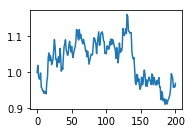

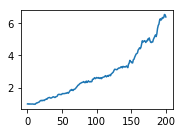

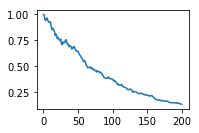

In [28]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
Price()

plt.subplot(2,2,2)
Price(u=0.01)

plt.subplot(2,2,3)
Price(u=-0.01)

plt.show()